In [1]:
import numpy as np
import pandas as pd

### 0) map()

In [2]:
lis = [[1,2,3],[4,5,6],[7,8,9],[10,11,12]]
df = pd.DataFrame(data=lis,columns=["first","second","third"])
df

,first,second,third
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [3]:
# Suppose if we want to add 2 with each items in columns three then

# map(function)

df['third'] = df['third'].map(lambda x : x + 2)

df

,first,second,third
0,1,2,5
1,4,5,8
2,7,8,11
3,10,11,14


In [4]:
# Apply map on Series

s = pd.Series(data=['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [5]:
s.map({'cat' : 'Big Cat', 'dog' : 'Big Dog'})

0    Big Cat
1    Big Dog
2        NaN
3        NaN
dtype: object

In [6]:
df2 = pd.read_csv('Dataset/nba.csv')
df2.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2-Jun,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,6-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,5-Jun,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,5-Jun,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,10-Jun,231,NaN,5000000.0


In [7]:
df2['Position'].value_counts()

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

In [8]:
df3 = df2.copy()

In [9]:
df3['Position'] = df3['Position'].map({'SG' : 0, 'PF' : 1, 'PG' : 2, 'SF' : 3, 'C' : 4})

df3.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,2,25,2-Jun,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,3,25,6-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,0,27,5-Jun,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,0,22,5-Jun,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,1,29,10-Jun,231,NaN,5000000.0


In [13]:
df3['Position'].value_counts()

0    102
1    100
2     92
3     85
4     78
Name: Position, dtype: int64

In [14]:
df3['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [15]:
df3.Team.dtypes

dtype('O')

In [16]:
df3['Name'].map(lambda a : len(str(a)))

0      13
1      11
2      12
3      11
4      13
       ..
452    10
453    12
454     9
455    12
456    11
Name: Name, Length: 457, dtype: int64

In [17]:
df3['Team'].map(lambda a : len(str(a))).head()

0    14
1    14
2    14
3    14
4    14
Name: Team, dtype: int64

In [37]:
data = pd.DataFrame(data={"start_year":[2001,2002,2005,2005,2006],
                         "end_year":[2002,2010,2008,2006,2014]})
data

,start_year,end_year
0,2001,2002
1,2002,2010
2,2005,2008
3,2005,2006
4,2006,2014


In [38]:
# .map() applies function elements-wise in series

# Create a function
def get_new_year(a):
    if a > 2004:
        return a + 10
    else:
        return a

In [39]:
# Now map it to the Series
data['start_year'].map(get_new_year)

0    2001
1    2002
2    2015
3    2015
4    2016
Name: start_year, dtype: int64

In [40]:
# We can do this using lambda function
data['start_year'].map(lambda a : a+10 if a > 2004 else a)

0    2001
1    2002
2    2015
3    2015
4    2016
Name: start_year, dtype: int64

In [41]:
# Add this new columns
data['new_year'] = data['start_year'].map(get_new_year)

In [42]:
data

,start_year,end_year,new_year
0,2001,2002,2001
1,2002,2010,2002
2,2005,2008,2015
3,2005,2006,2015
4,2006,2014,2016


### 1) df.apply()

#### DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)[source]
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [21]:
df = pd.DataFrame(data=[[4, 9]] * 3, columns=['A', 'B'])
df

,A,B
0,4,9
1,4,9
2,4,9


In [22]:
# Using a numpy universal function in this case same as np.sqrt(df)

df.apply(func=np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [24]:
# Using a reducing function on either axis

df.apply(func=np.sum, axis=0)

A    12
B    27
dtype: int64

In [25]:
df.apply(func=np.sum, axis=1)

0    13
1    13
2    13
dtype: int64

In [26]:
# Returning a list-like will result in a Series

df.apply(func=lambda x : [1,2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [27]:
# Passing result_type='expand' will expand list-like results to columns of a Dataframe

df.apply(func=lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [28]:
# Returning a Series inside the function is similar to passing result_type='expand'. The resulting column names will be the Series index.

df.apply(func=lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


In [29]:
# Passing result_type='broadcast' will ensure the same shape result, whether list-like or scalar is returned by 
# the function, and broadcast it along the axis. The resulting column names will be the originals.

df.apply(func=lambda x: [1, 2], axis=1, result_type='broadcast')

,A,B
0,1,2
1,1,2
2,1,2


In [31]:
# apply method use for series and dataframe both

information = {"Name":["Alamin Bhuyan","Fatema Akter","Mim Akter","Tania Akter"],"Age":[21,22,23,24],
              "Results":[80.7,70.6,61.8,71.8]}
data_frame = pd.DataFrame(information)

In [32]:
data_frame

,Name,Age,Results
0,Alamin Bhuyan,21,80.7
1,Fatema Akter,22,70.6
2,Mim Akter,23,61.8
3,Tania Akter,24,71.8


In [33]:
# This apply method use on the Series elements

data_frame['Results'].apply(func=np.ceil)

0    81.0
1    71.0
2    62.0
3    72.0
Name: Results, dtype: float64

In [34]:
# This apply method use on the Series elements

data_frame['Age'].apply(func=lambda x : x + 2)

0    23
1    24
2    25
3    26
Name: Age, dtype: int64

In [35]:
# This apply method use on the entire DataFrame elements

data_frame.apply(func=len)

Name       4
Age        4
Results    4
dtype: int64

In [36]:
data_frame.apply(func=lambda a : str(a), axis=0)

Name       0    Alamin Bhuyan\n1     Fatema Akter\n2     ...
Age        0    21\n1    22\n2    23\n3    24\nName: Age,...
Results    0    80.7\n1    70.6\n2    61.8\n3    71.8\nNa...
dtype: object

### apply() is like map() function but it works on row and columns based on the Entier DataFrame(specify the axis)

In [45]:
data

,start_year,end_year,new_year
0,2001,2002,2001
1,2002,2010,2002
2,2005,2008,2015
3,2005,2006,2015
4,2006,2014,2016


In [43]:
def get_difference(vector):
    difference = vector.max() - vector.min()
    return difference

In [44]:
data.apply(func=get_difference, axis='columns') # axis = 1 means also columns

0     1
1     8
2    10
3    10
4    10
dtype: int64

In [46]:
data['difference'] = data.apply(func=get_difference, axis=1)
data

,start_year,end_year,new_year,difference
0,2001,2002,2001,1
1,2002,2010,2002,8
2,2005,2008,2015,10
3,2005,2006,2015,10
4,2006,2014,2016,10


In [47]:
# Same function apply using lambda method

data.apply(func=lambda a : a.max() - a.min(), axis=0)

start_year     5
end_year      12
new_year      15
difference     9
dtype: int64

### 2) df.applymap()

#### DataFrame.applymap(func, na_action=None, **kwargs)[source]
Apply a function to a Dataframe elementwise.

This method applies a function that accepts and returns a scalar to every element of a DataFrame.

#### applymap() change every value in the dataframe

In [48]:
df = pd.DataFrame(data=[[1, 2.12], [3.356, 4.567]])

df

,0,1
0,1.000,2.120
1,3.356,4.567


In [49]:
df.applymap(func=lambda x : len(str(x)))

,0,1
0,3,4
1,5,5


In [50]:
data

,start_year,end_year,new_year,difference
0,2001,2002,2001,1
1,2002,2010,2002,8
2,2005,2008,2015,10
3,2005,2006,2015,10
4,2006,2014,2016,10


In [51]:
data.applymap(func=lambda a : a + 5)

,start_year,end_year,new_year,difference
0,2006,2007,2006,6
1,2007,2015,2007,13
2,2010,2013,2020,15
3,2010,2011,2020,15
4,2011,2019,2021,15


In [52]:
data.applymap(func=lambda a : a / 2)

,start_year,end_year,new_year,difference
0,1000.5,1001.0,1000.5,0.5
1,1001.0,1005.0,1001.0,4.0
2,1002.5,1004.0,1007.5,5.0
3,1002.5,1003.0,1007.5,5.0
4,1003.0,1007.0,1008.0,5.0


### 3) df.pipe()

### 4) df.agg()

#### DataFrame.agg(func=None, axis=0, *args, **kwargs)[source]
Aggregate using one or more operations over the specified axis.

In [53]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [54]:
# Aggregate these functions over rows

df.agg(func=['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [55]:
# Different aggregations per column

df.agg(func={'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [58]:
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [56]:
# Aggregate different functions over the columns and rename the index of the resulting DataFrame

df.agg(x=('A', max), y=('B', 'min'), z=('C', np.mean))

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,6.0


In [57]:
df.agg(func='mean', axis='columns')

0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64

### 5) df.aggregate()

#### DataFrame.aggregate(func=None, axis=0, *args, **kwargs)[source]
Aggregate using one or more operations over the specified axis.

### same as df.agg()

### 6) df.transform()

#### DataFrame.transform(func, axis=0, *args, **kwargs)[source]
Call func on self producing a DataFrame with the same axis shape as self.

In [59]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [61]:
df.transform(func=lambda x : x + 5)

,A,B
0,5,6
1,6,7
2,7,8


In [62]:
# Even though the resulting DataFrame must have the same length as the input DataFrame, 
# it is possible to provide several input functions

s = pd.Series(data=range(3))
s

0    0
1    1
2    2
dtype: int64

In [63]:
s.transform(func=[np.sqrt, np.exp])

,sqrt,exp
0,0.000000,1.000000
1,1.000000,2.718282
2,1.414214,7.389056


In [64]:
df = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, 50, 100, 60, 120],
})
df

,Date,Data
0,2015-05-08,5
1,2015-05-07,8
2,2015-05-06,6
3,2015-05-05,1
4,2015-05-08,50
5,2015-05-07,100
6,2015-05-06,60
7,2015-05-05,120


In [65]:
df.groupby(by='Date')['Data'].transform('sum')

0     55
1    108
2     66
3    121
4     55
5    108
6     66
7    121
Name: Data, dtype: int64

In [66]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [67]:
df['size'] = df.groupby('c')['type'].transform(len)

df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


### 7) df.groupby()

#### DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)[source]
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [68]:
data = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
data

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [69]:
data.groupby(by='Animal').sum()

,Max Speed
Animal,
Falcon,750.0
Parrot,50.0


In [70]:
data.groupby(by=['Animal']).min()

,Max Speed
Animal,
Falcon,370.0
Parrot,24.0


In [71]:
data.groupby(by=['Animal']).count()

,Max Speed
Animal,
Falcon,2
Parrot,2


In [72]:
l = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])
df

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [73]:
df.groupby(by=['b']).sum()

,a,c
b,,
1.0,2,3
2.0,2,5


In [74]:
df.groupby(by='a', dropna=False).sum()

,b,c
a,,
1,4.0,9
2,1.0,3


In [75]:
df2 = pd.read_csv('Dataset/drinks.csv')
df2.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [76]:
df2.groupby(by=['continent']).count()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,53,53,53,53,53
Asia,44,44,44,44,44
Europe,45,45,45,45,45
North America,23,23,23,23,23
Oceania,16,16,16,16,16
South America,12,12,12,12,12


In [79]:
df2.groupby(by=['continent']).country.count()

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: country, dtype: int64

In [77]:
df2['continent'].value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [78]:
df2.groupby(by='continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [80]:
df2[df2['continent'] == 'Asia'].beer_servings.mean()

37.04545454545455

In [81]:
# We can apply multiple function using agg() method

df2.groupby(by='continent')['beer_servings'].agg(func=['count', 'max', 'min', 'mean'])

,count,max,min,mean
continent,,,,
Africa,53,376,0,61.471698
Asia,44,247,0,37.045455
Europe,45,361,0,193.777778
North America,23,285,1,145.434783
Oceania,16,306,0,89.687500
South America,12,333,93,175.083333


In [82]:
df2.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [83]:
%matplotlib inline

<AxesSubplot:xlabel='continent'>

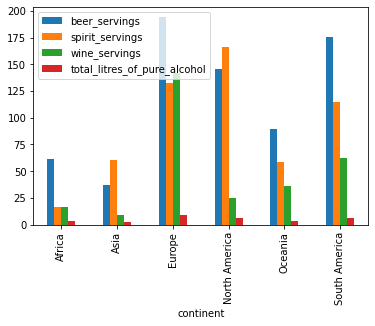

In [84]:
df2.groupby(by='continent').mean().plot(kind='bar')

In [86]:
df3 = pd.read_csv("Dataset/weather4.csv")
df3

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [87]:
group = df3.groupby(by='city')

In [88]:
for city, data in group:
    print(city)
    print("*"*20)
    print(data)

mumbai
********************
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
********************
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
********************
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [89]:
# To see specific group

group.get_group(name='mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [90]:
group.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [91]:
group.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [92]:
group.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [93]:
group.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [94]:
group.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

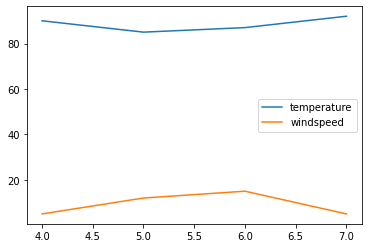

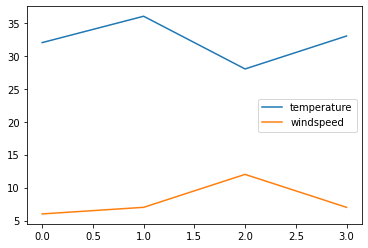

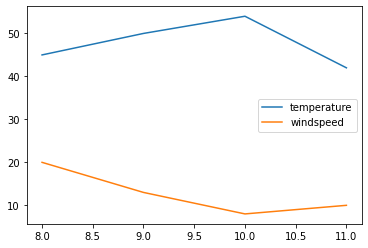

In [95]:
group.plot()

In [96]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [97]:
groups = df3.groupby(lambda x: grouper(df3, x, 'temperature'))
groups

In [98]:
for key, d in groups:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
Group by Key: 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
Group by Key: others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


### 8) df.rolling()

### 9) df.expanding()

### 10) df.ewm()